In [1]:
# Importing necessary libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the JSON file
file_path = '../Results/resultsPython.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Process all tasks dynamically
for task, task_data in data.items():
    for key, val in task_data.items():
        # Discard 'AveragePower' and 'Flops'
        val.pop("AveragePower", None)
        val.pop("Flops", None)
        
        # Average 'Time'
        if "Time" in val and val["Time"]:
            val["Time"] = np.nanmean(val["Time"])
        else:
            val["Time"] = None  # Handle empty lists or missing df
        
        # Average 'Time Linux'
        if "Time Linux" in val and val["Time Linux"]:
            val["Time Linux"] = np.nanmean(val["Time Linux"])
        else:
            val["Time Linux"] = None
        
        # Average 'Energy'
        if "Energy" in val and val["Energy"]:
            val["Energy"] = np.nanmean(pd.Series(val["Energy"]))
        else:
            val["Energy"] = None
        
        # Average 'Energy Linux'
        if "Energy Linux" in val and val["Energy Linux"]:
            val["Energy Linux"] = np.nanmean(val["Energy Linux"])
        else:
            val["Energy Linux"] = None


/var/folders/97/5d0k35yx4bbf147vrdxqdpm00000gn/T/ipykernel_85050/3154815715.py:27: RuntimeWarning: Mean of empty slice
  val["Energy"] = np.nanmean(pd.Series(val["Energy"]))


In [4]:
import math

# Function to remove entries with NaN Energy
def remove_nan_energy(df):
    tasks_to_remove = []
    for task, task_data in data.items():
        keys_to_remove = []
        for key, val in task_data.items():
            if "Energy" in val and (val["Energy"] is None or math.isnan(val["Energy"])):
                keys_to_remove.append(key)  # Mark for removal
        for key in keys_to_remove:
            del task_data[key]  # Remove the entry
        if not task_data:  # If all entries are removed, mark the task
            tasks_to_remove.append(task)
    for task in tasks_to_remove:
        del data[task]  # Remove empty tasks
    return data

# Apply the function
cleaned_data = remove_nan_energy(data)

cleaned_data


{'Sorted_GCD_Pair_Queries': {'human': {'Time': np.float64(7.114102999999997),
   'Energy': np.float64(41.232930874775704),
   'Time Linux': np.float64(13.004130622400002),
   'Energy Linux': np.float64(210.483)}},
 'N-Queens_II': {'human': {'Time': np.float64(3.5153930000000004),
   'Energy': np.float64(18.104558300729796),
   'Time Linux': np.float64(6.2765264079000005),
   'Energy Linux': np.float64(96.79)},
  'o1': {'Time': np.float64(3.238908000000001),
   'Energy': np.float64(14.875959599893147),
   'Time Linux': np.float64(5.7443938741),
   'Energy Linux': np.float64(92.239)},
  '4o': {'Time': np.float64(2.998551),
   'Energy': np.float64(13.894710731275865),
   'Time Linux': np.float64(5.4300857384),
   'Energy Linux': np.float64(83.364)},
  'copilot': {'Time': np.float64(3.269968),
   'Energy': np.float64(14.93529423855746),
   'Time Linux': np.float64(5.8645767583),
   'Energy Linux': np.float64(90.547)}},
 'Number_of_Subarrays_With_AND_Value_of_K': {'human': {'Time': np.float

In [91]:
import pandas as pd

# Function to convert nested dictionary to DataFrame
def json_to_dataframe(data):
    records = []
    for task, task_data in data.items():
        for key, val in task_data.items():
            record = {"Task": task, "Model": key}
            record.update(val)  # Add all attributes of the key
            records.append(record)
    return pd.DataFrame(records)

# Convert the cleaned JSON data to DataFrame
df = json_to_dataframe(cleaned_data)

print(df)


                                           Task    Model       Time  \
0                       Sorted_GCD_Pair_Queries    human   7.114103   
1                                   N-Queens_II    human   3.515393   
2                                   N-Queens_II       o1   3.238908   
3                                   N-Queens_II       4o   2.998551   
4                                   N-Queens_II  copilot   3.269968   
..                                          ...      ...        ...   
143  Find_the_Largest_Palindrome_Divisible_by_K  copilot  41.702116   
144                           Maximal_Rectangle    human   3.009251   
145                           Maximal_Rectangle       o1   3.114664   
146                           Maximal_Rectangle       4o   3.216673   
147                           Maximal_Rectangle  copilot   3.332378   

         Energy  Time Linux  Energy Linux  
0     41.232931   13.004131       210.483  
1     18.104558    6.276526        96.790  
2     14.875960

In [28]:
# Calculate the mean energy usage
mean_time=df['Time'].mean()
mean_energy = df['Energy'].mean()
mean_time_linux=df['Time Linux'].mean()
mean_energy_linux = df['Energy Linux'].mean()

# Print the results
print(f"Mean Time: {mean_time}")
print(f"Mean Energy: {mean_energy}")
print(f"Mean Time Linux: {mean_time_linux}")
print(f"Mean Energy Linux: {mean_energy_linux}")

Mean Time: 6.7891043716216215
Mean Energy: 35.41444720215214
Mean Time Linux: 11.29417347791554
Mean Energy Linux: 184.60616891891888


In [ ]:
# Define x-axis values
x_values = [10, 30, 100, 200, 500, 1000, 2000]
y_values = [1, 2, 3, 4, 5, 6, 7]  # Example y-values for demonstration

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(x_values)), y_values, color='blue')  # Use range(len(x_values)) for equal spacing
plt.xticks(range(len(x_values)), x_values)  # Replace x-axis ticks with the actual values
plt.xlabel("X-axis values (equally spaced)")
plt.ylabel("Y-axis values")
plt.title("Matplotlib Scatter Plot with Equally Spaced X-axis Values")
plt.grid(True)
plt.show()

In [102]:
import matplotlib.scale as mscale
import matplotlib.ticker as ticker
import matplotlib.transforms as mtransforms
import numpy as np
import numpy.ma as ma

class ExponentialScale(mscale.ScaleBase):
    name = 'expo'
    base = 1.1
    logbase = math.log(base)

def __init__(self, axis, **kwargs):
    mscale.ScaleBase.__init__(self)
    self.thresh = None #thresh

def get_transform(self):
    return self.ExponentialTransform(self.thresh)

def set_default_locators_and_formatters(self, axis):
    # I could not get LogLocator to do what I wanted. I don't understand
    # the docs about "subs" and the source was not clear to me.
    # So I just spell out the lines I want:
    major = [1, 5, 10, 12, 14, 16, 18, 20, 25, 28, 30] + range(31,60)
    axis.set_major_locator(ticker.FixedLocator(major))

class ExponentialTransform(mtransforms.Transform):
    input_dims = 1
    output_dims = 1
    is_separable = True

    def __init__(self, thresh):
        mtransforms.Transform.__init__(self)
        self.thresh = thresh

    def transform_non_affine(self, a):
        res = ma.power(ExponentialScale.base, a)
        return res

    def inverted(self):
        return ExponentialScale.InvertedExponentialTransform(self.thresh)

class InvertedExponentialTransform(mtransforms.Transform):
    input_dims = 1
    output_dims = 1
    is_separable = True

    def __init__(self, thresh):
        mtransforms.Transform.__init__(self)
        self.thresh = thresh

    def transform_non_affine(self, a):
        denom = np.repeat(ExponentialScale.logbase, len(a))
        return np.log(a) / denom

    def inverted(self):
        return ExponentialScale.ExponentialTransform(self.thresh)

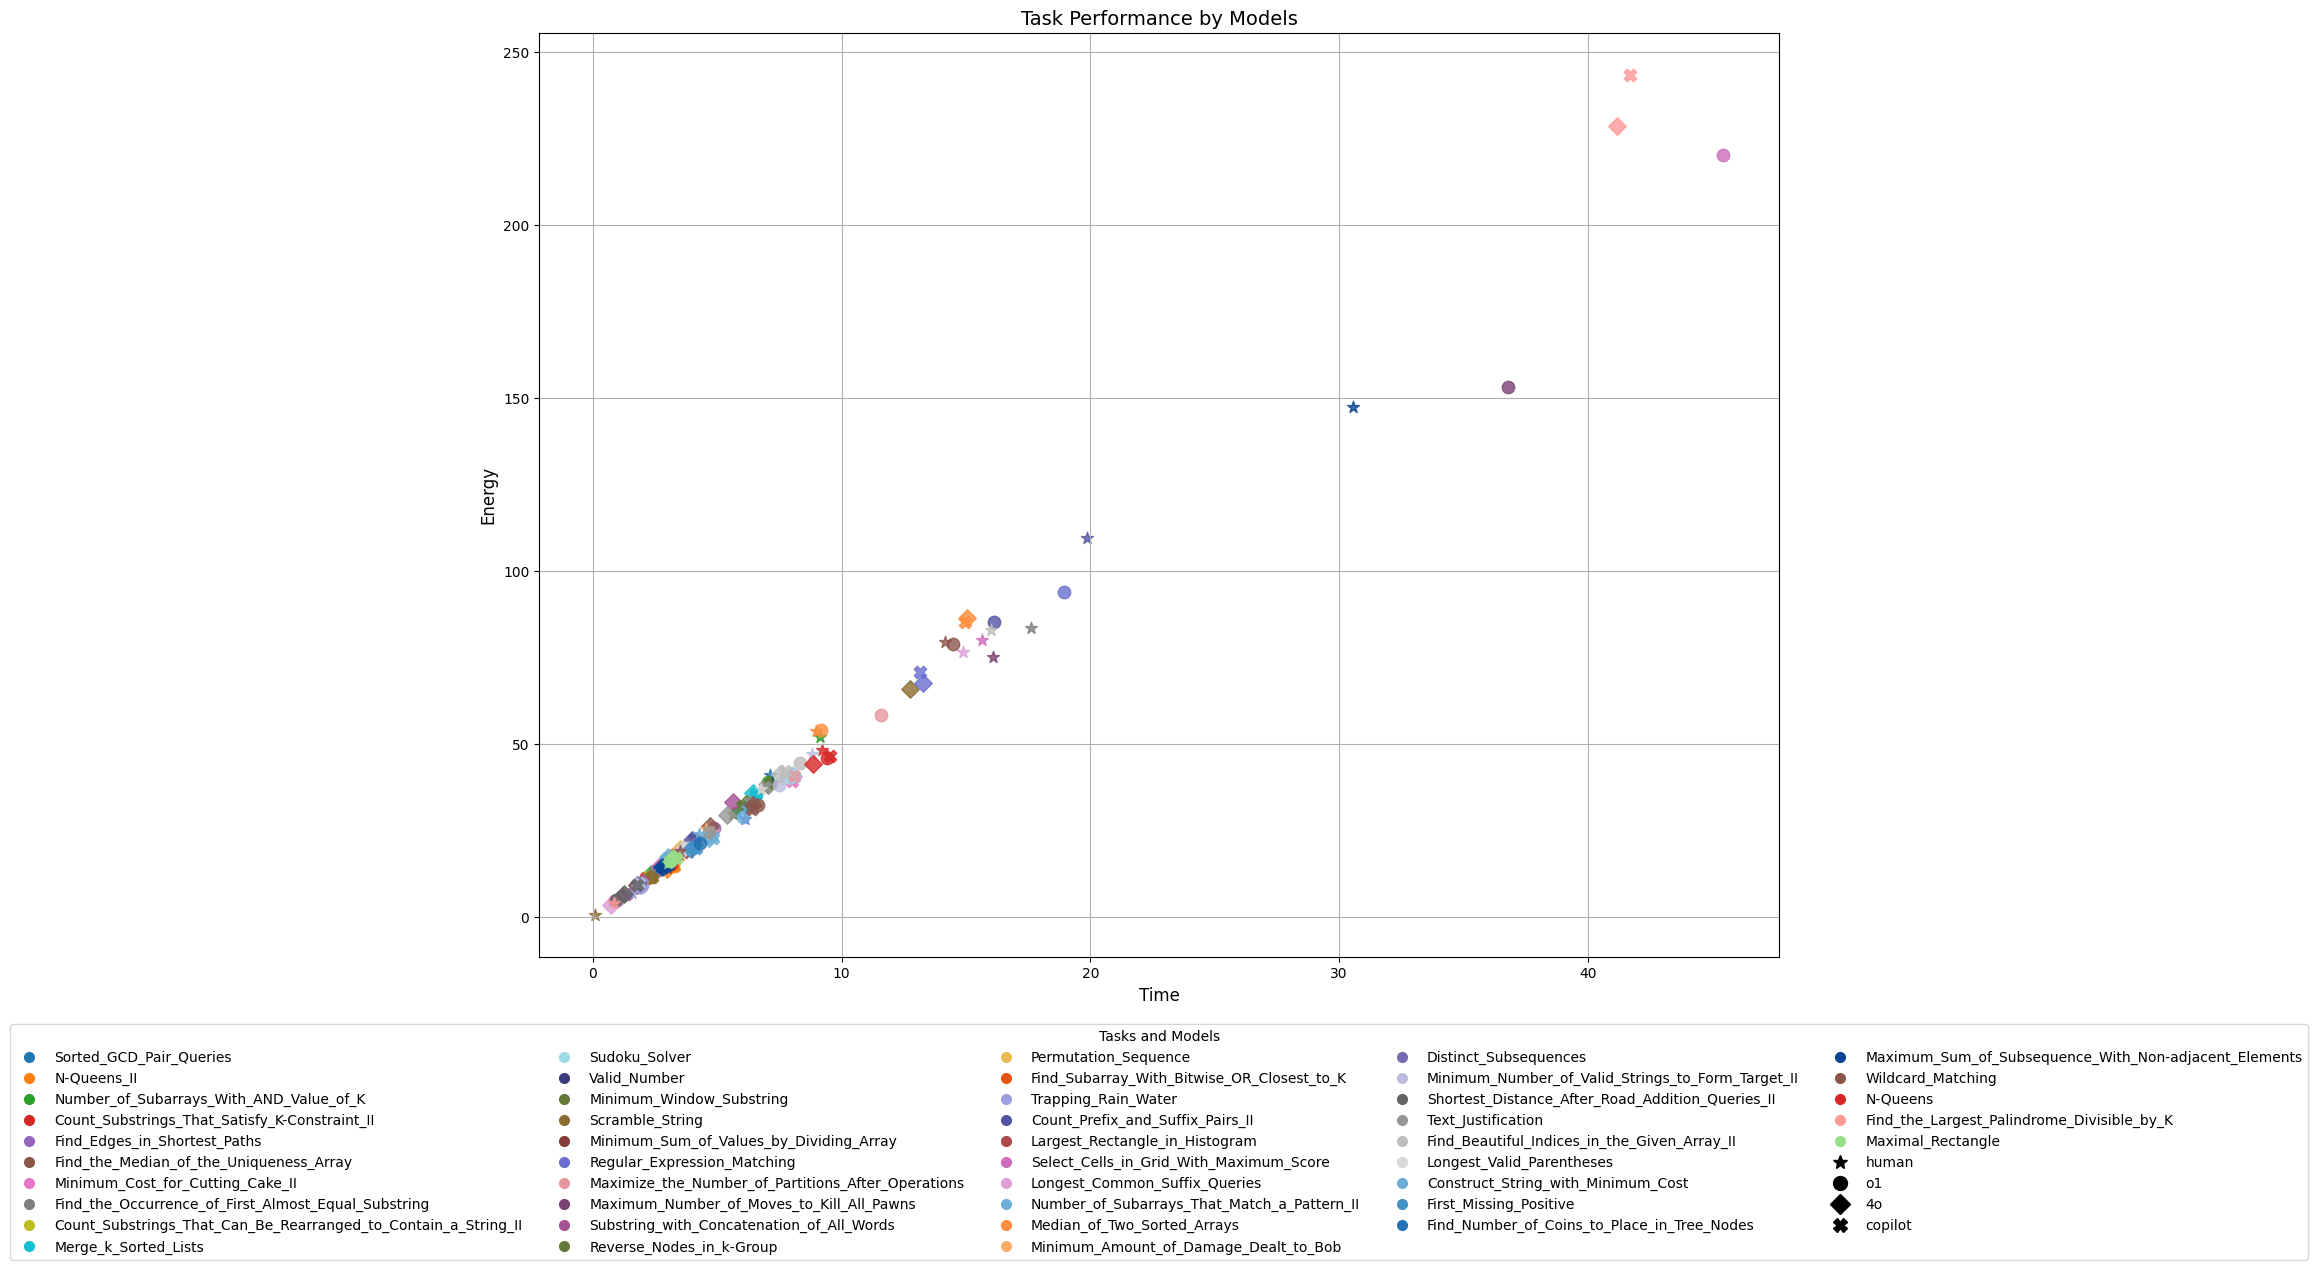

In [105]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# Assigning unique markers for each model
unique_models = df['Model'].unique()
markers = ['*', 'o', 'D', 'X']
model_marker_map = {model: markers[i % len(markers)] for i, model in enumerate(unique_models)}


# Generate 53 distinct colors using Plotly's qualitative palette
distinct_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#9edae5", "#393b79", "#637939", "#8c6d31", "#843c39", "#6b6ecf", "#e7969c", "#7b4173", "#a55194", "#637939",
    "#e7ba52", "#e6550d", "#9c9ede", "#5254a3", "#ad494a", "#ce6dbd", "#de9ed6", "#6baed6", "#fd8d3c", "#fdae6b",
    "#756bb1", "#bcbddc", "#636363", "#969696", "#bdbdbd", "#d9d9d9", "#6baed6", "#4292c6", "#2171b5", "#084594",
    "#8c564b", "#d62728", "#ff9896", "#98df8a", "#ffbb78", "#2ca02c", "#c5b0d5", "#c49c94", "#f7b6d2", "#bcbd22",
    "#17becf"
]
task_color_map = {task: distinct_colors[i % len(distinct_colors)] for i, task in enumerate(df['Task'].unique())}

x_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50]
y_values = [10, 20, 30, 50, 100, 200, 250]
# Initialize the plot
plt.figure(figsize=(16, 12))
marker_size = 80

# Iterate through tasks and models directly
for task, color in task_color_map.items():
    for model, marker in model_marker_map.items():
        # Plot the points for each task-model combination
        plt.scatter(
            df[(df['Task'] == task) & (df['Model'] == model)]['Time'],  # Filter by task and model
            df[(df['Task'] == task) & (df['Model'] == model)]['Energy'],
            color=color, marker=marker, alpha=0.8, s=marker_size
        )

# Combine tasks and models into a single legend
legend_elements = []

# Add tasks to the legend
for task, color in task_color_map.items():
    legend_elements.append(
        plt.Line2D([0], [0], color=color, marker='o', markersize=7, label=task, linestyle='None')
    )

# Add models to the legend
for model, marker in model_marker_map.items():
    legend_elements.append(
        plt.Line2D([0], [0], color='black', marker=marker, markersize=10, label=model, linestyle='None')
    )

# Create the combined legend
plt.legend(
    handles=legend_elements,
    title="Tasks and Models",
    bbox_to_anchor=(0.5, -0.2),  # Place legend below the plot
    loc='center',
    ncol=5,  # 5 columns: 4 for tasks, 1 for models
    fontsize=10,
    frameon=True
)


# Add labels and grid
plt.title("Task Performance by Models", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Energy", fontsize=12)

# plt.gca().set_xscale('symlog', linthresh=10)
# plt.gca().set_yscale('symlog', linthresh=50)

plt.grid()
plt.savefig("python_plot.png", format="png", dpi=200)
plt.show()
